[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [1]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd

In [2]:
pars = {
    "employer_id": '3529',
    "page": 1,
    "per_page": 100
}
url = f'https://api.hh.ru/vacancies'

In [3]:
res = requests.get(url, params=pars)

In [4]:
res.json().keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [5]:
vacancies = res.json()
err=vacancies.get('errors')
num_pages = vacancies.get('pages')
num_pages

20

In [6]:
v = vacancies.get('items')

In [68]:
v[4]

{'id': '67908794',
 'premium': False,
 'name': 'Стажер Sber AI Lab',
 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 55000, 'to': 57000, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Кутузовский проспект',
  'building': '32',
  'description': None,
  'lat': 55.740426,
  'lng': 37.532071,
  'raw': 'Москва, Кутузовский проспект, 32',
  'metro': None,
  'metro_stations': [],
  'id': '6080840'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2022-07-19T11:32:28+0300',
 'created_at': '2022-07-19T11:32:28+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=67908794',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/67908794?host=hh.ru',
 'adv_response_url': 'https:/

In [8]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [9]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [10]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [11]:
vnum  = vacancies.get('pages')
vnum

20

In [12]:
all_vacancy_ids = []
all_vacancies = []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies'
    res = requests.get(url, params=pars)
    vacancies = res.json()
    all_vacancies.extend(vacancies.get('items'))
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
len(all_vacancy_ids)
#https://api.hh.ru/vacancies/66634517

2000

In [14]:
url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[0]}'

In [15]:
res = requests.get(url)

In [16]:
res.json().get('key_skills')

[]

In [69]:
vac_table = pd.json_normalize(all_vacancies)
vac_table.head(5)

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,salary,address.metro
0,67879831,False,Старший клиентский менеджер,False,False,NaN,None,None,2022-07-18T15:39:36+0300,2022-07-18T15:39:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67536591,False,Ведущий конструктор в Центр Робототехники,False,False,NaN,None,None,2022-07-06T12:41:40+0300,2022-07-06T12:41:40+0300,...,Кутузовская,МЦК,95.536,95,55.740833,37.533333,"[{'station_name': 'Кутузовская', 'line_name': ...",823806,NaN,NaN
2,68011820,False,Стажер DevOps,False,False,NaN,None,None,2022-07-21T08:23:59+0300,2022-07-21T08:23:59+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67470523,False,Менеджер по работе с ключевыми клиентами малог...,False,False,NaN,None,None,2022-07-04T17:18:35+0300,2022-07-04T17:18:35+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67908794,False,Стажер Sber AI Lab,False,False,NaN,None,None,2022-07-19T11:32:28+0300,2022-07-19T11:32:28+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,[],6080840,NaN,NaN


In [18]:
#Скачиваем описания всех вакансий
all_skills = []
for i in tqdm(range(len(all_vacancy_ids))):
    url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[i]}'
    res = requests.get(url)
    all_skills.append(res.json().get('key_skills'))

  0%|          | 0/2000 [00:00<?, ?it/s]

In [50]:
#Распаковываем словари внутри списков в обычные списки
skill_list = []
for skill in all_skills:
    if skill:
        temp_arr = []
        for item in skill:
            temp_arr.append(item["name"])
        skill_list.append(temp_arr)
    else: skill_list.append(False)
skill_list[1]

['SolidWorks', 'AutoCAD', 'ГОСТ', 'ЕСКД']

In [51]:
#Собираем навыки в объект Series, чтобы добавить колонкой к датафрейму
skills_table=pd.Series(skill_list)
skills_table.head(3)

0                                False
1    [SolidWorks, AutoCAD, ГОСТ, ЕСКД]
2                                False
dtype: object

In [53]:
#Добавляем колонку к датафрейму
vacs_and_skills=vac_table.copy(deep = True)
vacs_and_skills.insert(column="skills", value = skills_table,loc = 3)

In [54]:
vacs_and_skills.head(3)

,id,premium,name,skills,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,salary,address.metro
0,67879831,False,Старший клиентский менеджер,False,False,False,NaN,None,None,2022-07-18T15:39:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67536591,False,Ведущий конструктор в Центр Робототехники,"[SolidWorks, AutoCAD, ГОСТ, ЕСКД]",False,False,NaN,None,None,2022-07-06T12:41:40+0300,...,Кутузовская,МЦК,95.536,95,55.740833,37.533333,"[{'station_name': 'Кутузовская', 'line_name': ...",823806,NaN,NaN
2,68011820,False,Стажер DevOps,False,False,False,NaN,None,None,2022-07-21T08:23:59+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Приводим даты к нужному формату
vacs_and_skills["published_at"]=pd.to_datetime(vacs_and_skills["published_at"])
vacs_and_skills["published_at"].dtypes

datetime64[ns, pytz.FixedOffset(180)]

In [33]:
dates_for_plot = vacs_and_skills.copy(deep = True)
dates_for_plot["published_at"] = pd.to_datetime(dates_for_plot["published_at"]).dt.date
dates_for_plot=dates_for_plot.groupby(["published_at"]).count()
dates_for_plot['id']

published_at
2022-06-26     20
2022-06-27     40
2022-06-28     40
2022-06-29    140
2022-06-30     80
2022-07-01    180
2022-07-02     20
2022-07-03     20
2022-07-04     60
2022-07-05    160
2022-07-06    100
2022-07-07     80
2022-07-08     80
2022-07-11     40
2022-07-12    180
2022-07-13    120
2022-07-14     80
2022-07-15     60
2022-07-18    100
2022-07-19     60
2022-07-20    140
2022-07-21     60
2022-07-22    120
2022-07-24     20
Name: id, dtype: int64

<AxesSubplot:xlabel='published_at'>

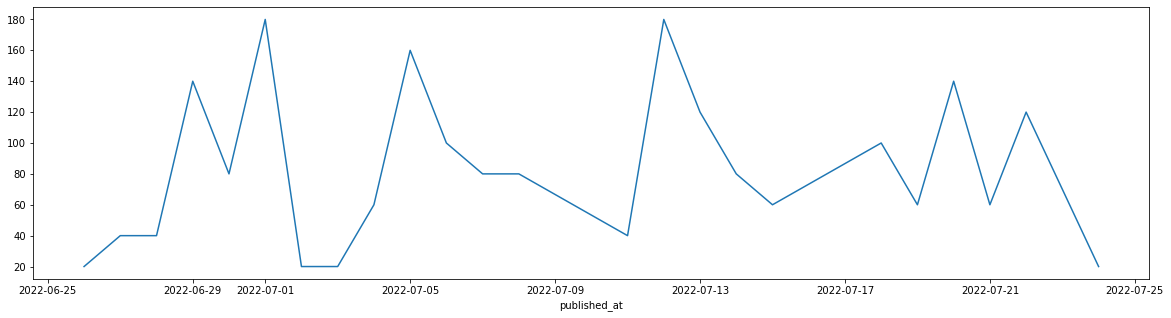

In [34]:
dates_for_plot['id'].plot(figsize=(20,5))

In [49]:
#Группируем данные по дням недели, сортируем по количеству вакансий
weekdays_for_plot=vacs_and_skills.copy(deep = True)
weekdays_for_plot["published_at"]=pd.to_datetime(weekdays_for_plot["published_at"]).dt.weekday
weekdays_for_plot_series=weekdays_for_plot.groupby(["published_at"]).count()
weekdays_for_plot_series['id'].sort_values(ascending=False).rename({
    0: "Понедельник",
    1: "Вторник",
    2: "Среда",
    3: "Четверг",
    4: "Пятница",
    5: "Суббота",
    6: "Воскресенье"})

published_at
Среда          500
Вторник        440
Пятница        440
Четверг        300
Понедельник    240
Воскресенье     60
Суббота         20
Name: id, dtype: int64

In [97]:
#Ищем вакансии, для которых в навыках указан Python
python_vacs = vacs_and_skills.copy(deep = True)
python_vacs = python_vacs.filter(items = ["id", "name", "skills", "published_at", "schedule.name"])
python_id_list = python_vacs.explode("skills").query("skills == 'Python'")["id"]
python_for_plot = python_vacs[python_vacs['id'].isin(python_id_list)]
python_plot_series = python_for_plot.explode("skills").groupby("skills").count()['id']
python_plot_series

skills
Docker                      20
Git                         20
Machine Learning            20
Numpy                       20
Pandas                      20
PyTorch                     20
Python                     100
Recsys                      20
SQL                         40
Soft skills                 20
TDD                         20
Ориентация на результат     20
Работа с банками            20
Name: id, dtype: int64

<AxesSubplot:ylabel='skills'>

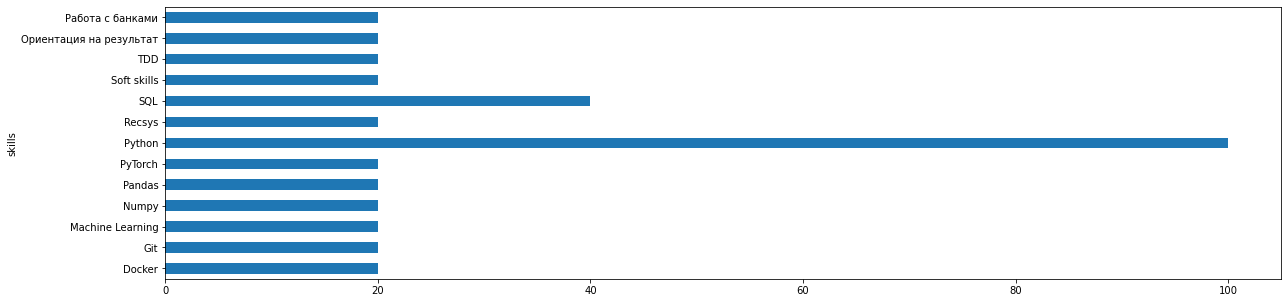

In [98]:
#Строим график востребованных навыков
python_plot_series.plot(figsize=(20,5), kind = 'barh')